# Cluster Classification Metrix

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import joblib
from sklearn.metrics import roc_auc_score, accuracy_score, precision_recall_fscore_support
import xgboost as xgb

from clulib import allowed_energies, make_data

In [2]:
matplotlib.rcParams['font.size'] = 18

In [3]:
def preprocess_data(data, energy):
    return data[data[:, :-2].sum(axis=1) * 10**3 > 0.8 * energy]

In [4]:
def make_metrics(clf, X, y):
    dtest = xgb.DMatrix(X, label=y)
    prob = clf.predict(dtest)
    pred = prob > 0.5
    rocauc = roc_auc_score(y, prob)
    acc = accuracy_score(y, pred)
    prrf = precision_recall_fscore_support(y, pred)
    piprec, gaprec = prrf[0]
    pireco, gareco = prrf[1]
    pifsco, gafsco = prrf[2]
    return rocauc, acc, piprec, gaprec, pireco, gareco, pifsco, gafsco

In [5]:
metrics = []
energies = np.array(allowed_energies()[5:])
for energy in energies:
    data = np.load(f'npy/e{energy}.npz')
    pidata = preprocess_data(data['pione'], energy)
    gadata = preprocess_data(data['gaone'], energy)
    _, X_test, _, y_test = make_data(pidata, gadata)
    print(energy, X_test.shape)
    xgb_model_fname = f'models/xgb_{energy}.joblib'
    clf = joblib.load(xgb_model_fname)
    metrics.append(make_metrics(clf, X_test, y_test))
energies = energies / 10**3
metrics = np.array(metrics)

1000 (21341, 26)
1250 (24991, 26)
1500 (29613, 26)
1750 (32477, 26)
2000 (33999, 26)
2250 (34935, 26)
2500 (35531, 26)
2750 (34291, 26)
3000 (32510, 26)


## ROC AUC and Accuracy Score

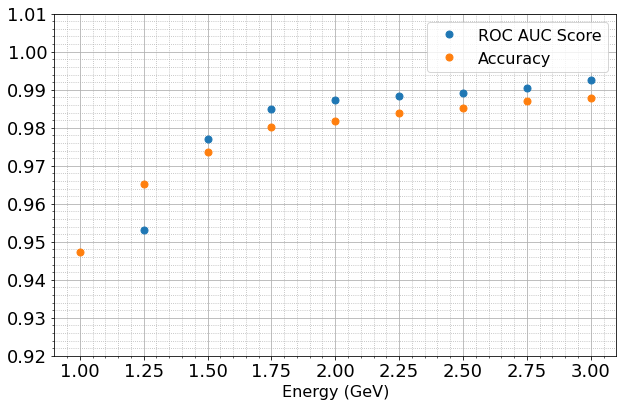

In [10]:
plt.figure(figsize=(9, 6))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.plot(energies, metrics[:, 0], linestyle='none', marker='o', markersize=7, label='ROC AUC Score')
plt.plot(energies, metrics[:, 1], linestyle='none', marker='o', markersize=7, label='Accuracy')
plt.legend(fontsize=16)
plt.ylim((0.92, 1.01))
plt.xlabel('Energy (GeV)', fontsize=16)
plt.tight_layout()
plt.savefig(f'plots/roc_auc_acc.png')

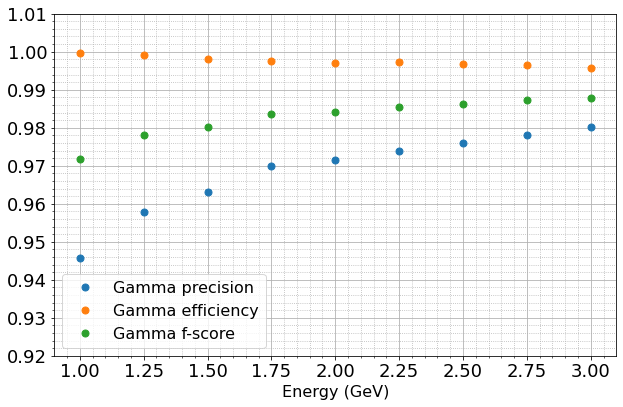

In [7]:
plt.figure(figsize=(9, 6))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.plot(energies, metrics[:, 3], linestyle='none', marker='o', markersize=7, label='Gamma precision')
plt.plot(energies, metrics[:, 5], linestyle='none', marker='o', markersize=7, label='Gamma efficiency')
plt.plot(energies, metrics[:, 7], linestyle='none', marker='o', markersize=7, label='Gamma f-score')
plt.legend(fontsize=16)
plt.ylim((0.92, 1.01))
plt.xlabel('Energy (GeV)', fontsize=16)
plt.tight_layout()
plt.savefig(f'plots/gamma_metric.png')

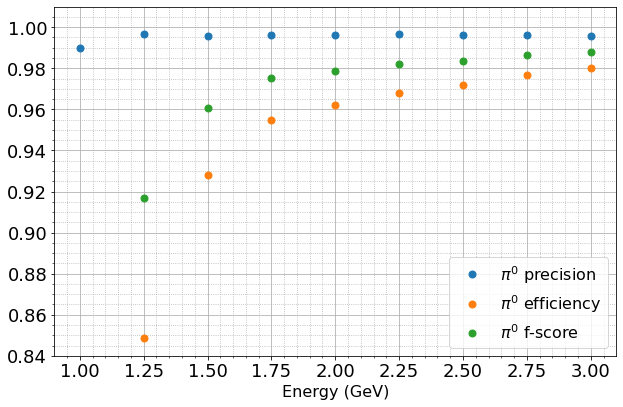

In [8]:
plt.figure(figsize=(9, 6))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.plot(energies, metrics[:, 2], linestyle='none', marker='o', markersize=7, label=r'$\pi^0$ precision')
plt.plot(energies, metrics[:, 4], linestyle='none', marker='o', markersize=7, label=r'$\pi^0$ efficiency')
plt.plot(energies, metrics[:, 6], linestyle='none', marker='o', markersize=7, label=r'$\pi^0$ f-score')
plt.legend(fontsize=16)
plt.ylim((0.84, 1.01))
plt.xlabel('Energy (GeV)', fontsize=16)
plt.tight_layout()
plt.savefig(f'plots/pi0_metric.png')